In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### For practice purpose, we will randomly remove a few values

In [3]:
# Define the columns to modify
cols_to_modify = ['Name', 'Pclass','Sex','Age','Fare']

# Use the sample() method to select a random subset of rows for each column to modify
rows_to_modify = {}
for col in cols_to_modify:
    rows_to_modify[col] = df[col].dropna().sample(n=np.random.randint(25, 100)).index

# Set the values in the selected rows and columns to NaN
for col in cols_to_modify:
    df.loc[rows_to_modify[col], col] = np.nan

### Taking a look

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3.0,Mr. William Henry Allen,male,NaN,0,0,8.0500


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2.0,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1.0,Miss. Margaret Edith Graham,female,NaN,0,0,30.00
884,0,3.0,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1.0,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3.0,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [6]:
df.sample(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
712,0,3.0,Mr. Peter Andreas Lauritz Andersen Soholt,male,19.0,0,0,7.6500
624,1,1.0,Miss. Gretchen Fiske Longley,female,21.0,0,0,77.9583
182,1,2.0,Master. Richard F Becker,male,1.0,2,1,39.0000
548,0,2.0,Mr. Percival James R Sharp,male,27.0,0,0,26.0000
791,0,2.0,Mr. Richard Otter,NaN,39.0,0,0,13.0000
407,0,3.0,Miss. Ida Lefebre,female,3.0,3,1,25.4667
322,0,3.0,Mr. George John Jr Sage,male,20.0,8,2,69.5500
383,0,2.0,Mr. Charles Henry Davies,male,18.0,0,0,73.5000
382,0,3.0,Mr. Vasil Plotcharsky,male,27.0,0,0,7.8958
673,0,3.0,Mr. Frederick Charles Sawyer,male,24.5,0,0,8.0500


In [7]:
df.shape

(887, 8)

In [8]:
#here we can see the column names, the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   789 non-null    float64
 2   Name                     835 non-null    object 
 3   Sex                      839 non-null    object 
 4   Age                      855 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     847 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.6+ KB


In [9]:
#View number of uniques and counts
df['Pclass'].value_counts()

3.0    444
1.0    193
2.0    152
Name: Pclass, dtype: int64

In [10]:
# in percentage form
df['Pclass'].value_counts(normalize=True)

3.0    0.562738
1.0    0.244613
2.0    0.192649
Name: Pclass, dtype: float64

In [11]:
# how many unique names -- in this case, no passanger has the same name 
df['Name'].nunique()

835

In [12]:
# showing duplicates by multiple columns
# there are cases shown as some names are nulls
df[df.duplicated(subset=['Name', 'Pclass'])].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
45,0,3.0,NaN,male,20.0,1,0,15.50
82,0,1.0,NaN,male,28.0,0,0,47.10
86,0,3.0,NaN,male,20.0,0,0,8.05
89,0,3.0,NaN,male,29.0,0,0,8.05
97,1,2.0,NaN,female,34.0,0,1,23.00


### Missing values

In [13]:
#we can also use this to check for nulls
df.isnull().any()

Survived                   False
Pclass                      True
Name                        True
Sex                         True
Age                         True
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                        True
dtype: bool

In [14]:
# this is even better because we will know how many missing values there are
df.isnull().sum()

Survived                    0
Pclass                     98
Name                       52
Sex                        48
Age                        32
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                       40
dtype: int64

In [15]:
# this gives the percentage missing in decimals
df.isnull().mean().round(3)

Survived                   0.000
Pclass                     0.110
Name                       0.059
Sex                        0.054
Age                        0.036
Siblings/Spouses Aboard    0.000
Parents/Children Aboard    0.000
Fare                       0.045
dtype: float64

In [16]:
#print row with missing data 
rows_with_missing_data = df[df.isnull().any(axis=1)]
rows_with_missing_data.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
4,0,3.0,Mr. William Henry Allen,male,NaN,0,0,8.0500
8,1,3.0,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,NaN
12,0,NaN,Mr. William Henry Saundercock,NaN,20.0,0,0,8.0500
14,0,3.0,Miss. Hulda Amanda Adolfina Vestrom,female,NaN,0,0,7.8542
17,1,2.0,Mr. Charles Eugene Williams,male,NaN,0,0,13.0000
24,0,NaN,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
27,0,NaN,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
33,0,2.0,Mr. Edward H Wheadon,male,66.0,0,0,NaN
34,0,1.0,Mr. Edgar Joseph Meyer,NaN,28.0,1,0,82.1708
38,0,3.0,NaN,female,18.0,2,0,18.0000


### What to do with Missing Data?
#### Missing data analysis
Missing data (littles chi sq test)
 
 - Missing Completely At Random (MCAR)
 - Missing At Random (MAR) – no true way to test
 - Missing Not At Random (MNAR)
 
Important to find out if there is a pattern to missing. eg. maybe it is a sensitive info in a survey!

#### Deleting vs imputting

Deleting missing data: 
 - delete entire row vs delete column vs pairwise
 - Deleting may not be the best answer as you may delete important information

 
Impute: 
 - **Arbitrary value**: eg. Educated guess that “Employment” column was not filled because they don’t have employment so use 0
 - **Creating a missing feature**
 - **Separate category**: label missing as missing category
 - **Mean value**: for numeric column. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first. At times mean can create a strange relationship as well (eg. imputing mean benchpress weight to an 80yo participant dont make sense)
 - **Median**: is the middlemost value. It’s better to use the median value for imputation in the case of outliers.
 - **Mode** is the most frequently occurring value. It is used in the case of categorical features.
 - **Hot-deck imputation**: In this method, missing values are imputed by values from similar cases in the same dataset. Hot-deck imputation can preserve the original distribution of the data, but it can introduce bias if the similarity criterion is not well-defined.
 - **Forward fill**: In some cases, imputing the values with the previous value instead of mean, mode or median is more appropriate. This is called forward fill. It is mostly used in time series data.
 - **KNN imputer**: k-Nearest Neighbours approach where a Euclidean distance is used to find the nearest neighbours base on features
 - **Regression**: similar to KNN but more for numerical 

Every method presents a pro and con and have to be carefully thought through. 

In [17]:
# example for dropping data -- which we will not be running as I do not want any lost of info at this point
# df = df.drop_duplicates(keep='last')
# df = df.drop(columns=['col1', 'col2'])
# df.drop('sex', axis = 1, inplace=True)

In [18]:
# Replace missing values with the mean of the column
# we will not put inplace=True as this is a demo 
# we will isntead show the before and after
df['age_mean_imputed'] = df['Age'].fillna(df['Age'].mean()).round(2)

# Define the columns you want to display
cols_to_display = ['age_mean_imputed', 'Age']
missing_display = df[df['Age'].isnull()]
missing_display[cols_to_display].sample(5)

,age_mean_imputed,Age
361,29.57,NaN
257,29.57,NaN
61,29.57,NaN
399,29.57,NaN
17,29.57,NaN


In [19]:
# Replace missing values with the mode of the column
# we will not put inplace=True as this is a demo 
# we will isntead show the before and after

# Calculate the mode of the column
mode_value = df['Sex'].mode()[0]

# Fill missing values with the mode
df['sex_mode_imputed'] = df['Sex'].fillna(mode_value)


# Define the columns you want to display
cols_to_display = ['sex_mode_imputed', 'Sex']
missing_display = df[df['Sex'].isnull()]
missing_display[cols_to_display].sample(5)

,sex_mode_imputed,Sex
174,male,NaN
164,male,NaN
696,male,NaN
813,male,NaN
467,male,NaN


### Filtering

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,22.00,male
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,38.00,female
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,26.00,female
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35.00,female
4,0,3.0,Mr. William Henry Allen,male,NaN,0,0,8.0500,29.57,male


In [21]:
#Filter by value use & or | for multiple
df[df['Fare'] > 70].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,38.0,female
27,0,NaN,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000,19.0,male
31,1,1.0,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208,48.0,female
34,0,1.0,Mr. Edgar Joseph Meyer,NaN,28.0,1,0,82.1708,28.0,male
51,1,1.0,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292,49.0,female


In [22]:
# this is like a: Select * from DF where ... and ... and ...
df[(df["age_mean_imputed"] > 40) & (df["sex_mode_imputed"] == "male") & (df["Fare"] > 70)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
123,0,1.0,Mr. Percival Wayland White,male,54.0,0,1,77.2875,54.0,male
244,0,1.0,Dr. William Edward Minahan,male,44.0,2,0,90.0000,44.0,male
260,0,1.0,Mr. Emil Taussig,male,52.0,1,1,79.6500,52.0,male
266,1,1.0,Mrs. William Thompson (Edith Junkins) Graham,NaN,58.0,0,1,153.4625,58.0,male
304,1,1.0,Miss. Margaret Fleming,NaN,42.0,0,0,110.8833,42.0,male


In [23]:
# filtering by 2 values of a column
df[df['Pclass'].isin([1, 2])].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,38.0,female
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35.0,female
6,0,1.0,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,54.0,male
9,1,2.0,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,14.0,female
11,1,1.0,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500,58.0,female


In [24]:
# Not in ~
df[~df['Pclass'].isin([1, 2])].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,22.00,male
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,26.00,female
4,0,3.0,Mr. William Henry Allen,male,NaN,0,0,8.0500,29.57,male
5,0,3.0,Mr. James Moran,male,27.0,0,0,8.4583,27.00,male
7,0,3.0,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,2.00,male


In [25]:
# select where col between 10 and 30
df[df['Fare'].between(10, 30)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
7,0,3.0,Master. Gosta Leonard Palsson,male,2.0,3,1,21.075,2.0,male
10,1,3.0,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.700,4.0,female
11,1,1.0,Miss. Elizabeth Bonnell,female,58.0,0,0,26.550,58.0,female
15,1,2.0,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.000,55.0,female
16,0,3.0,Master. Eugene Rice,male,2.0,4,1,29.125,2.0,male


In [26]:
#select rows that contain the highest fare price
#there may be more than 1 max
df[df['Fare'] == df['Fare'].max()]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
257,1,1.0,Miss. Anna Ward,female,NaN,0,0,512.3292,29.57,female
676,1,1.0,NaN,male,36.0,0,1,512.3292,36.00,male
733,1,1.0,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292,35.00,male


### Encoding/binning values

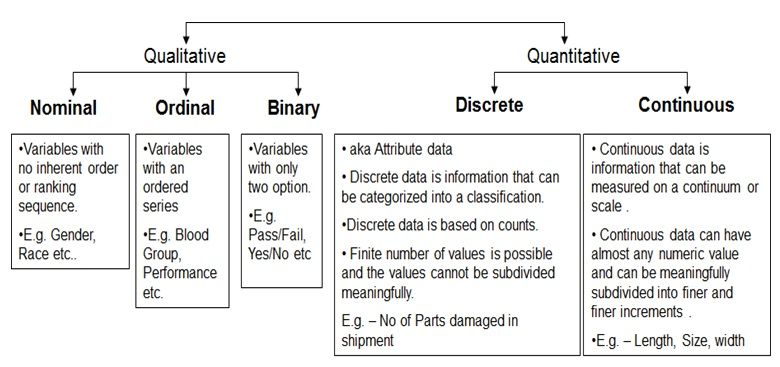

In [58]:
from IPython.display import Image

# Load the image from a file
image_path = 'd_type.jpg'
image = Image(filename=image_path)

# Display the image inline in the notebook
display(image)

In [27]:
# Create age groups
# bins can be use for WOE encoding which deals with missing data well

bins = [0, 12, 18, 45, 150]
labels = ['children', 'teens', 'adults', 'seniors']
df['age_group'] = pd.cut(df['age_mean_imputed'], bins=bins, labels=labels, include_lowest=True)

# Sample an equal number of rows for each unique value in 'col'
n = 3
df[['age_group', 'age_mean_imputed']].groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), n))).head(12)


,age_group,age_mean_imputed
747,children,6.0
615,children,4.0
442,children,4.0
571,teens,16.0
67,teens,17.0
575,teens,18.0
28,adults,24.0
718,adults,34.0
608,adults,21.0
656,seniors,58.0


In [28]:
# doing the same with function instead
# Define a function to categorize passengers by age group

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 65:
        return 'Adult'
    else:
        return 'Senior'

# Apply the categorize_age function to the Age column and create a new column called AgeGroup
df['age_group2'] = df['Age'].apply(categorize_age)


df[['age_group', 'age_group2']].groupby('age_group2', group_keys=False).apply(lambda x: x.sample(min(len(x), n))).head(12)

,age_group,age_group2
713,adults,Adult
36,teens,Adult
401,adults,Adult
64,children,Child
529,teens,Child
547,teens,Child
362,adults,Senior
90,adults,Senior
508,seniors,Senior


In [29]:
#ordinal/binary encoding
#both use same type of code
#can be used on psychological variables to infer quantity from order

df['age_group_ordinal'] = df['age_group'].map({"children":0,
                                                "teens":1,
                                                "adults":2,
                                                "seniors":3}).astype("int32")



df[['age_mean_imputed','age_group','age_group_ordinal']].groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), n))).head(12)


,age_mean_imputed,age_group,age_group_ordinal
688,4.00,children,0
641,0.75,children,0
179,8.00,children,0
22,15.00,teens,1
826,15.00,teens,1
609,18.00,teens,1
463,21.00,adults,2
636,37.00,adults,2
424,19.00,adults,2
767,48.00,seniors,3


In [56]:
#one hot encoding (norminal data only, can produce too many columns/dimensions)
#good for statistical analysis and post-hoc analysis as it preserve column name and meaning
pd.concat([df['Sex'],pd.get_dummies(df['Sex'])], axis=1).head()

,Sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [57]:
#one hot encoding with drop one 
#only need n-1 columns as 0 for male = female
#in this case, it becomes binary
pd.concat([df['Sex'],pd.get_dummies(df['Sex'], drop_first=True)], axis=1).head()

,Sex,male
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [62]:
#Target/mean encoding - high performance in machine learning without increasing dimensions
#the categorical variable is replaced with the mean (or some other statistical measure) of the target variable for each category.
# must train-test split first

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the target variable and categorical variable to be encoded
target_col = 'Survived'
cat_col = 'age_group'

# Calculate the mean survival rate for each category in the training data
means = train_df.groupby(cat_col)[target_col].mean()

# Create a new column with the mean survival rate for each category
train_df[cat_col+'_mean'] = train_df[cat_col].map(means)
test_df[cat_col+'_mean'] = test_df[cat_col].map(means)

train_df[['age_group', cat_col+'_mean']].head()

,age_group,age_group_mean
365,adults,0.382743
487,adults,0.382743
732,seniors,0.360825
317,adults,0.382743
812,adults,0.382743


### Simple queries

In [30]:
# agg with groupby 
df.groupby("Pclass")["Fare"].mean()

Pclass
1.0    86.166644
2.0    20.100991
3.0    13.804018
Name: Fare, dtype: float64

In [31]:
df.groupby("Pclass")["Fare"].agg(["count", "mean", "median"])

,count,mean,median
Pclass,,,
1.0,186,86.166644,62.66875
2.0,143,20.100991,13.50000
3.0,422,13.804018,8.05000


In [32]:
# Sorting
# resetting index is just for looks
df['Fare'].sort_values(ascending=False).reset_index().head()

,index,Fare
0,733,512.3292
1,676,512.3292
2,257,512.3292
3,87,263.0000
4,435,263.0000


In [33]:
df[['Fare']].describe()

,Fare
count,847.000000
mean,32.703905
std,50.340446
min,0.000000
25%,7.925000
50%,14.500000
75%,31.275000
max,512.329200


In [34]:
#ID of person with highest fare
df['Fare'].idxmax()

257

In [35]:
pd.crosstab(df['Pclass'], df['sex_mode_imputed'])

sex_mode_imputed,female,male
Pclass,,
1.0,79,114
2.0,60,92
3.0,127,317


In [36]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed,age_group,age_group2,age_group_ordinal
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,22.00,male,adults,Adult,2
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,38.00,female,adults,Adult,2
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,26.00,female,adults,Adult,2
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35.00,female,adults,Adult,2
4,0,3.0,Mr. William Henry Allen,male,NaN,0,0,8.0500,29.57,male,adults,Senior,2


# Pivot

In [37]:
df.drop_duplicates(subset='Name', inplace=True)
df.pivot(index='Name', columns='Pclass', values=['sex_mode_imputed','Siblings/Spouses Aboard']).sample(10)

sex_mode_imputed          \
Pclass                                                          NaN     1.0   
Name                                                                          
Miss. Kate Connolly                                             NaN     NaN   
Miss. Joan Wells                                                NaN     NaN   
Mr. Karl Ivar Sven Berglund                                     NaN     NaN   
Mr. Niels Peder Jensen                                         male     NaN   
Mr. Johan Werner Salonen                                        NaN     NaN   
Mr. Satio Coleff                                                NaN     NaN   
Mr. John Horgan                                                 NaN     NaN   
Miss. Pieta Sofia Ilmakangas                                    NaN     NaN   
Mrs. William (Anna Sylfven) Lahtinen                            NaN     NaN   
Mrs. Frederic Oakley (Margaretta Corning Stone)...              NaN  female   

                                                                    \
Pclass                                                 2.0     3.0   
Name                                                                 
Miss. Kate Connolly                                    NaN  female   
Miss. Joan Wells                                    female     NaN   
Mr. Karl Ivar Sven Berglund                            NaN    male   
Mr. Niels Peder Jensen                                 NaN     NaN   
Mr. Johan Werner Salonen                               NaN    male   
Mr. Satio Coleff                                       NaN    male   
Mr. John Horgan                                        NaN    male   
Miss. Pieta Sofia Ilmakangas                           NaN    male   
Mrs. William (Anna Sylfven) Lahtinen                female     NaN   
Mrs. Frederic Oakley (Margaretta Corning Stone)...     NaN     NaN   

                                                   Siblings/Spouses Aboard  \
Pclass                                                                 NaN   
Name                                                                         
Miss. Kate Connolly                                                    NaN   
Miss. Joan Wells                                                       NaN   
Mr. Karl Ivar Sven Berglund                                            NaN   
Mr. Niels Peder Jensen                                                   0   
Mr. Johan Werner Salonen                                               NaN   
Mr. Satio Coleff                                                       NaN   
Mr. John Horgan                                                        NaN   
Miss. Pieta Sofia Ilmakangas                                           NaN   
Mrs. William (Anna Sylfven) Lahtinen                                   NaN   
Mrs. Frederic Oakley (Margaretta Corning Stone)...                     NaN   

                                                                   
Pclass                                              1.0  2.0  3.0  
Name                                                               
Miss. Kate Connolly                                 NaN  NaN    0  
Miss. Joan Wells                                    NaN    1  NaN  
Mr. Karl Ivar Sven Berglund                         NaN  NaN    0  
Mr. Niels Peder Jensen                              NaN  NaN  NaN  
Mr. Johan Werner Salonen                            NaN  NaN    0  
Mr. Satio Coleff                                    NaN  NaN    0  
Mr. John Horgan                                     NaN  NaN    0  
Miss. Pieta Sofia Ilmakangas                        NaN  NaN    1  
Mrs. William (Anna Sylfven) Lahtinen                NaN    1  NaN  
Mrs. Frederic Oakley (Margaretta Corning Stone)...    1  NaN  NaN

In [38]:
# Pivot the dataset to show the count of passengers in each class and their survival status
pivot_df = pd.pivot_table(df, values='Name', index=['Survived'], columns=['Pclass'], aggfunc='count')
pivot_df

Pclass,1.0,2.0,3.0
Survived,,,
0,63,77,313
1,118,65,103


### Editing Strings

In [39]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'age_mean_imputed',
       'sex_mode_imputed', 'age_group', 'age_group2', 'age_group_ordinal'],
      dtype='object')

In [40]:
df['Name'].sample(10)

615                           Miss. Marion Louise Becker
79                                   Mr. Achille Waelens
381    Mrs. Alexander Oskar (Mary Aline Towner) Holve...
26                                Mr. Farred Chehab Emir
806                                Mr. William Alexander
816    Mrs. Charles Melville (Clara Jennings Gregg) Hays
68                                      Mr. Vincenz Kink
464                            Mr. John Montgomery Smart
34                                Mr. Edgar Joseph Meyer
577                           Miss. Julie Rachel Christy
Name: Name, dtype: object

In [41]:
df['Name_lower'] = df['Name'].str.lower()
df['Name_upper'] = df['Name'].str.upper()
df['Name_replace'] = df['Name'].str.replace('Mr', 'Mister')

In [42]:
li = ['Name', 'Name_lower', 'Name_upper', 'Name_replace']
df[li].sample(10)

,Name,Name_lower,Name_upper,Name_replace
640,Mr. Choong Foo,mr. choong foo,MR. CHOONG FOO,Mister. Choong Foo
847,Mr. Johan Svensson,mr. johan svensson,MR. JOHAN SVENSSON,Mister. Johan Svensson
800,Mr. Oskar Arvid Hedman,mr. oskar arvid hedman,MR. OSKAR ARVID HEDMAN,Mister. Oskar Arvid Hedman
645,Mr. Edward Willey,mr. edward willey,MR. EDWARD WILLEY,Mister. Edward Willey
834,Mr. Chang Chip,mr. chang chip,MR. CHANG CHIP,Mister. Chang Chip
347,Mr. Jovan Dimic,mr. jovan dimic,MR. JOVAN DIMIC,Mister. Jovan Dimic
253,Mrs. Viktor (Helena Wilhelmina) Rosblom,mrs. viktor (helena wilhelmina) rosblom,MRS. VIKTOR (HELENA WILHELMINA) ROSBLOM,Misters. Viktor (Helena Wilhelmina) Rosblom
169,Mr. Wyckoff Van der hoef,mr. wyckoff van der hoef,MR. WYCKOFF VAN DER HOEF,Mister. Wyckoff Van der hoef
568,Mrs. Edward Dale (Charlotte Lamson) Appleton,mrs. edward dale (charlotte lamson) appleton,MRS. EDWARD DALE (CHARLOTTE LAMSON) APPLETON,Misters. Edward Dale (Charlotte Lamson) Appleton
827,Master. George Sibley Richards,master. george sibley richards,MASTER. GEORGE SIBLEY RICHARDS,Master. George Sibley Richards


In [43]:
df[['Salutation','F_name','L_name']] = df['Name'].str.split(n=2, expand=True)
df[['Salutation','F_name','L_name','Name']].head()

,Salutation,F_name,L_name,Name
0,Mr.,Owen,Harris Braund,Mr. Owen Harris Braund
1,Mrs.,John,Bradley (Florence Briggs Thayer) Cumings,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,Miss.,Laina,Heikkinen,Miss. Laina Heikkinen
3,Mrs.,Jacques,Heath (Lily May Peel) Futrelle,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,Mr.,William,Henry Allen,Mr. William Henry Allen


### Lambda Functions

In [44]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'age_mean_imputed',
       'sex_mode_imputed', 'age_group', 'age_group2', 'age_group_ordinal',
       'Name_lower', 'Name_upper', 'Name_replace', 'Salutation', 'F_name',
       'L_name'],
      dtype='object')

In [45]:
#example of a lambda function with apply
df['age_group_lambda']=df['age_group'].apply(lambda x: x+" human")
df['age_group_lambda'].head()

0    adults human
1    adults human
2    adults human
3    adults human
4    adults human
Name: age_group_lambda, dtype: category
Categories (4, object): ['children human' < 'teens human' < 'adults human' < 'seniors human']

In [46]:
print('max fare = ', df['Fare'].max())

#calculate percentage against the highest fare
#round to 2 decimal
#convert to string
#add % sign
#str and round is outside as it is a python func not pandas

df['percentage_of_max_fare']= df['Fare'].apply(lambda x: str(round(x/df['Fare'].max()*100,2))+" %")
df['percentage_of_max_fare'].head()

max fare =  512.3292


0     1.42 %
1    13.91 %
2     1.55 %
3    10.36 %
4     1.57 %
Name: percentage_of_max_fare, dtype: object

In [47]:
#lambda function with condition 
df['expensive']=df['Fare'].apply(lambda x: 'Expensive' if x>=300 else 'Not Expensive')
df['expensive'].value_counts()

Not Expensive    834
Expensive          2
Name: expensive, dtype: int64

### Plots

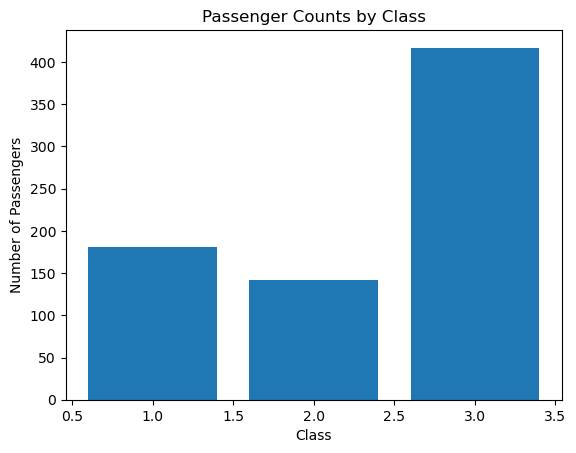

In [48]:
# Bar chart showing the number of passengers in each class
class_counts = df["Pclass"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Passengers")
plt.title("Passenger Counts by Class")
plt.show()

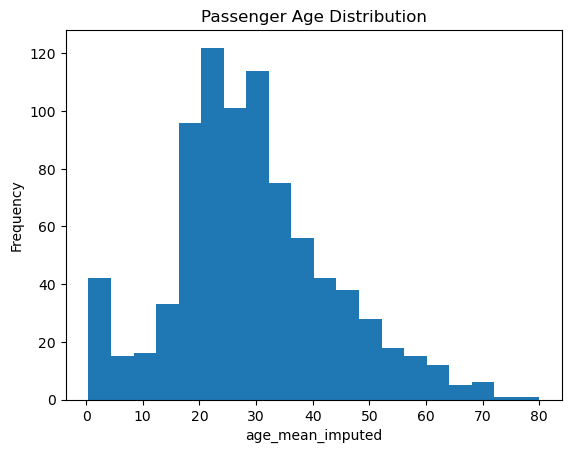

In [49]:
# Histogram showing the distribution of passenger ages
plt.hist(df["age_mean_imputed"], bins=20)
plt.xlabel("age_mean_imputed")
plt.ylabel("Frequency")
plt.title("Passenger Age Distribution")
plt.show()

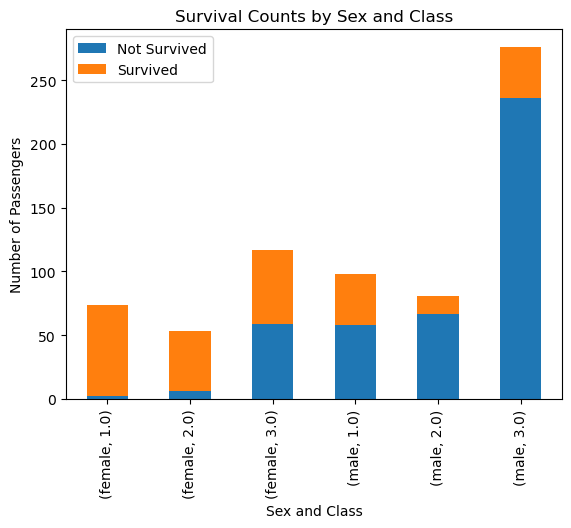

In [50]:
# Stacked bar chart showing the survival rates of male and female passengers in each class
survival_counts = df.groupby(["Sex", "Pclass", "Survived"]).size().unstack()
survival_counts.plot(kind="bar", stacked=True)
plt.xlabel("Sex and Class")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Sex and Class")
plt.legend(["Not Survived", "Survived"], loc="upper left")
plt.show()

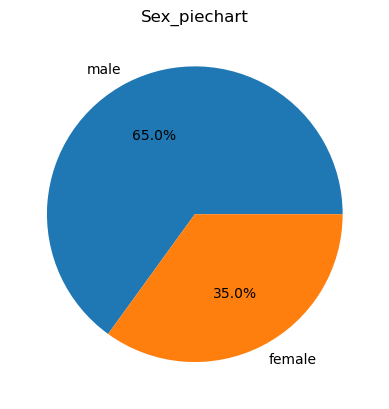

In [51]:
# Pie chart showing the proportion of passengers in each port of embarkation
Sex_counts = df["Sex"].value_counts()
plt.pie(Sex_counts.values, labels=Sex_counts.index, autopct="%1.1f%%")
plt.title("Sex_piechart")
plt.show()

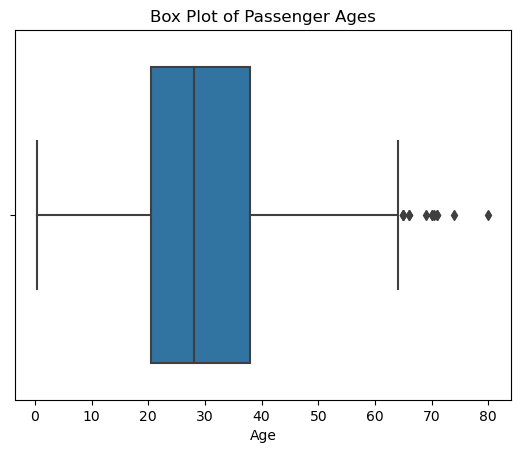

In [52]:
# Create a box plot for the age column
sns.boxplot(x=df["Age"])
plt.xlabel("Age")
plt.title("Box Plot of Passenger Ages")
plt.show()

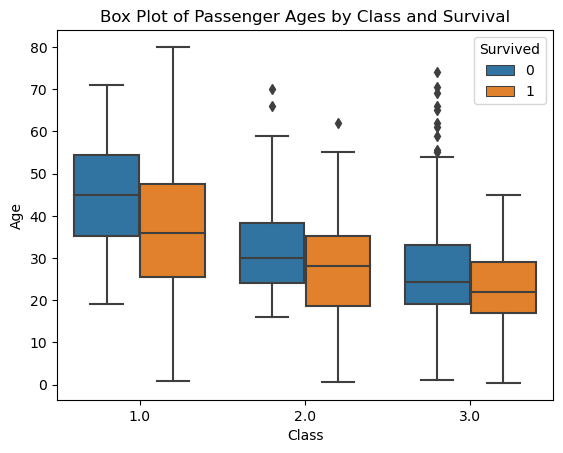

In [53]:
# Create a box plot for the age column, grouped by passenger class and survival
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=df)
plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Box Plot of Passenger Ages by Class and Survival")
plt.show()

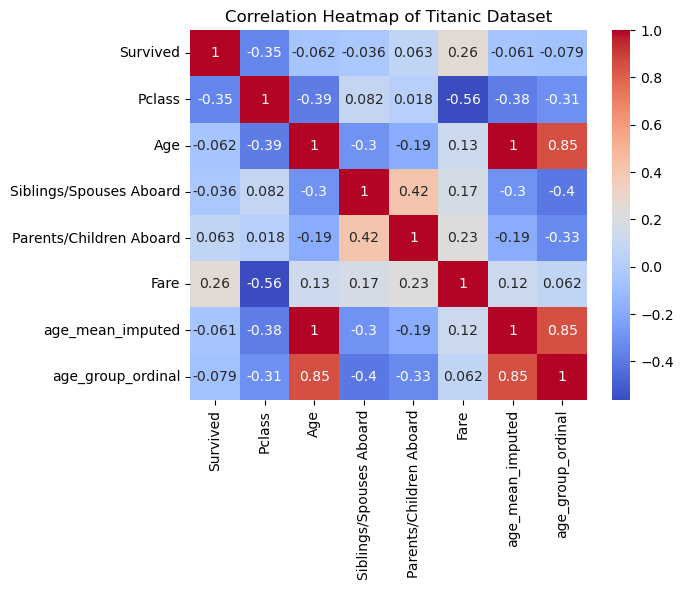

In [54]:
# Create a correlation heatmap for all numerical columns
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

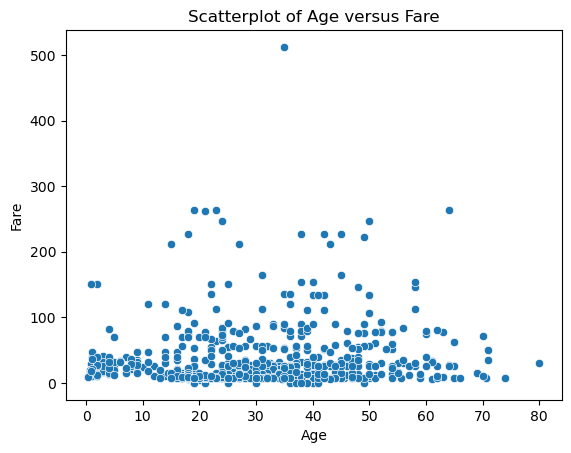

In [55]:
# Create a scatterplot of age versus fare
sns.scatterplot(x="Age", y="Fare", data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatterplot of Age versus Fare")
plt.show()